## Проект: вариант 2
Вы – единственный аналитик в компании, на которого легла ответственность за поиск инсайтов в данных продуктовых магазинов вашей компании.

На повестке 3 задачи:

### Задание 1
В файле содержится информация о покупках людей

* id – означает покупку (в одну покупку входят все товары, купленные пользователем во время 1 похода в магазин)
* Товар – наименование товара
* Количество – число единиц купленного товара

Воспользуйтесь этими данными и выясните, какие пары товаров пользователи чаще всего покупают вместе. По сути, вам необходимо найти паттерны покупок, что позволит оптимизировать размещение продуктов в магазине, для удобства пользователей и увеличения выручки.

* 1_Товар – наименование первого товара
* 2_Товар – наименование второго товара
* Встречаемость – число раз, когда такая пара была встречена

Другими словами: 2 раза люди покупали одновременно чай и арбуз, 1 раз одновременно покупали арбуз и сгущёнку и 1 раз одновременно были куплены чай со сгущёнкой.

Напишите код на python для получения нужной таблицы и укажите 5 наиболее распространённых паттернов.

### Задание 2

К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям. Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%

Данные представлены в файле

### Задание 3

В базе данных вашей компании присутствуют следующие таблицы:

1. city
- city_id – id города, где проходит акция
- client_city_id – id города, где находится покупатель
- city – город
- client_city – город, где находится покупатель
* client
- client_id – id покупателя
- client_city_id – id города, где находится покупатель
- birth_date – дата рождения покупателя
- registration – дата регистрации покупателя
2. promotion
- promotion_id – id акции
- category_id – id категории
- promotion_name – акция
- category_name – категория
- partner_id – id партнёра
- partner_name – партнёр
3. purchase
- purchase_id – id покупки
- partner_id – id партнёра
- client_id – id покупателя
- city_id – id города
- promotion_id – id акции
- category_id – id категории
- purchase_date – дата покупки
- price – цена за единицу товара
- quantity – число проданных единиц
- status – статус покупки

Вам нужно написать запрос, чтобы получить такую таблицу

* purchase_date – дата покупки
* purchase_id – id покупки
* client_id – id покупателя
* client_age – возраст покупателя
* client_registration_age – как долго человек пользуется вашими магазинами
* client_category – содержит new или old, если это первая или последующая покупка соответственно
* promotion_name – акция
* category_name – категория
* partner_name – партнёр
* client_city – город, где находится покупатель
* city – город
* revenue – сумма выручки
* quantity – число проданных единиц

При этом в таблице должны присутствовать только значения, где в поле status стоит значение 1, и только те, где purchase_date находится в диапазоне от 01.05.2020 до 01.08.2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import itertools
from collections import Counter

sns.set(style='whitegrid', rc={'figure.figsize': (16,10)}) 

### Задание 1
Воспользуйтесь этими данными и выясните, какие пары товаров пользователи чаще всего покупают вместе. По сути, вам необходимо найти паттерны покупок, что позволит оптимизировать размещение продуктов в магазине, для удобства пользователей и увеличения выручки. Напишите код на python для получения нужной таблицы и укажите 5 наиболее распространённых паттернов.

In [2]:
purchases = pd.read_csv('test1_completed.csv')
purchases = purchases.rename(columns={"Товар": "product", "Количество": "quantity"})
purchases.head()

,id,product,quantity
0,17119,Лимон,1.1
1,17119,Лимон оранжевый,0.7
2,17119,Лук-порей,10.0
3,17119,Лук репчатый,2.5
4,17119,Малина свежая,1.0


In [3]:
pairs = []
for _, group in purchases.sort_values('product').groupby('id'):
    pairs += list(itertools.combinations(group['product'], 2))

combinations_count = dict(Counter(pairs))
combinations_count

patterns = (
    pd.DataFrame.from_dict(combinations_count, orient='index')
    .reset_index(0)
    .rename(columns={'index': 'products', 0: 'appearances'})
)

patterns[['first_product','second_product']] = pd.DataFrame(patterns.products.tolist(), index=patterns.index)
patterns.drop('products', axis=1, inplace=True)

patterns = patterns.sort_values('appearances', ascending=False)

patterns.head()

,appearances,first_product,second_product
266,431,Огурцы Луховицкие,Укроп
283,408,Петрушка,Укроп
3630,345,Арбуз,Огурцы Луховицкие
855,326,Кабачки,Огурцы Луховицкие
480,303,Кинза,Укроп


### Задание 2

К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям. Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%.

In [4]:
import statsmodels.formula.api as smf

In [5]:
orders = pd.read_csv('test2_completed.csv', parse_dates=['Дата'])
orders = orders.rename(columns={"Дата": "date", "Число заказов": "orders_count"})
orders

,date,orders_count
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


<AxesSubplot:xlabel='date', ylabel='orders_count'>

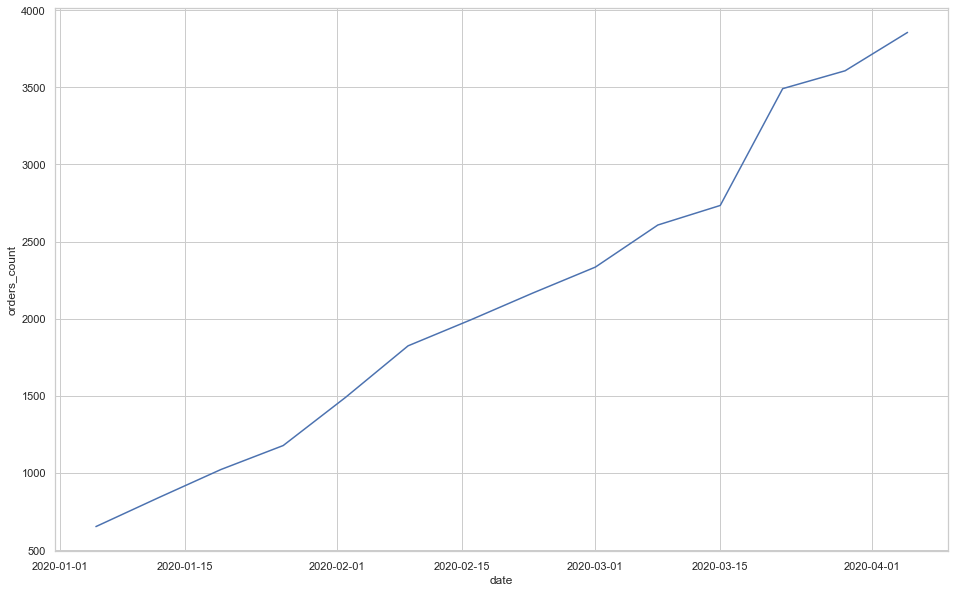

In [6]:
# для начала построим график изменения количества заказов  
sns.lineplot(x='date', y='orders_count', data=orders)

In [7]:
orders.orders_count.max() / orders.orders_count.min()

5.9338461538461535

Количество заказов постянно растет. За 14 недель количество заказов увеличилось почти в шесть раз.
Построение прогноза затруднено недостатком информации:
- было бы полезно знать, что является причиной такого роста продаж, например, мы создали новый продукт или подключили новые каналы продвижения;
- не хватает информации о товаре(ах), который мы продаем - подвержен ли спрос на него сезонности или влиянию других факторов;
- очень пригодилась бы информация о продажах за аналогичный период прошлого года. 

Воспользуемся одномерной линейной регрессией с единственной независимой переменной, в нашем случае - недельными временными отрезками.

In [8]:
# в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%.
# В прогнозе мы не сможем учесть влияние подобных акций, поэтому нужно подкорректировать значения продаж за этот период. 
orders.loc[orders['date'] == "2020-02-09", 'orders_count'] /= 1.07

In [9]:
orders

,date,orders_count
0,2020-01-05,650.000000
1,2020-01-12,837.000000
2,2020-01-19,1020.000000
3,2020-01-26,1176.000000
4,2020-02-02,1489.000000
5,2020-02-09,1703.738318
6,2020-02-16,1991.000000
7,2020-02-23,2166.000000
8,2020-03-01,2334.000000
9,2020-03-08,2607.000000


In [10]:
orders = orders.reset_index()

x = orders['index']
y = orders['orders_count']

results = smf.ols('y ~ x', orders).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     688.1
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           5.76e-12
Time:                        02:28:39   Log-Likelihood:                -88.244
No. Observations:                  14   AIC:                             180.5
Df Residuals:                      12   BIC:                             181.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    504.8844     72.400      6.974      0.0

C:\Users\AM\miniforge3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
# Построим прогноз на следующие 3 месяца ~ 14 недель.
ypred = results.predict()
ypred

array([ 504.88437917,  753.19599466, 1001.50761015, 1249.81922563,
       1498.13084112, 1746.44245661, 1994.7540721 , 2243.06568758,
       2491.37730307, 2739.68891856, 2988.00053405, 3236.31214953,
       3484.62376502, 3732.93538051])

In [12]:
x_new = np.arange(28).reshape((-1, 1))
y_new = results.predict(exog=dict(x=x_new))

In [13]:
dates = pd.date_range(start='2020-01-05', periods=28, freq='W')
    
data = {'date': dates, 'orders_count': orders.orders_count, 'orders_pred': y_new}
orders_real_and_predicted = pd.DataFrame(data)

orders_real_and_predicted.style.bar(subset=['orders_pred'], color='#67A5EB')

,date,orders_count,orders_pred
0,2020-01-05 00:00:00,650.000000,504.884379
1,2020-01-12 00:00:00,837.000000,753.195995
2,2020-01-19 00:00:00,1020.000000,1001.507610
3,2020-01-26 00:00:00,1176.000000,1249.819226
4,2020-02-02 00:00:00,1489.000000,1498.130841
5,2020-02-09 00:00:00,1703.738318,1746.442457
6,2020-02-16 00:00:00,1991.000000,1994.754072
7,2020-02-23 00:00:00,2166.000000,2243.065688
8,2020-03-01 00:00:00,2334.000000,2491.377303
9,2020-03-08 00:00:00,2607.000000,2739.688919


Text(0, 0.5, 'Количество заказов')

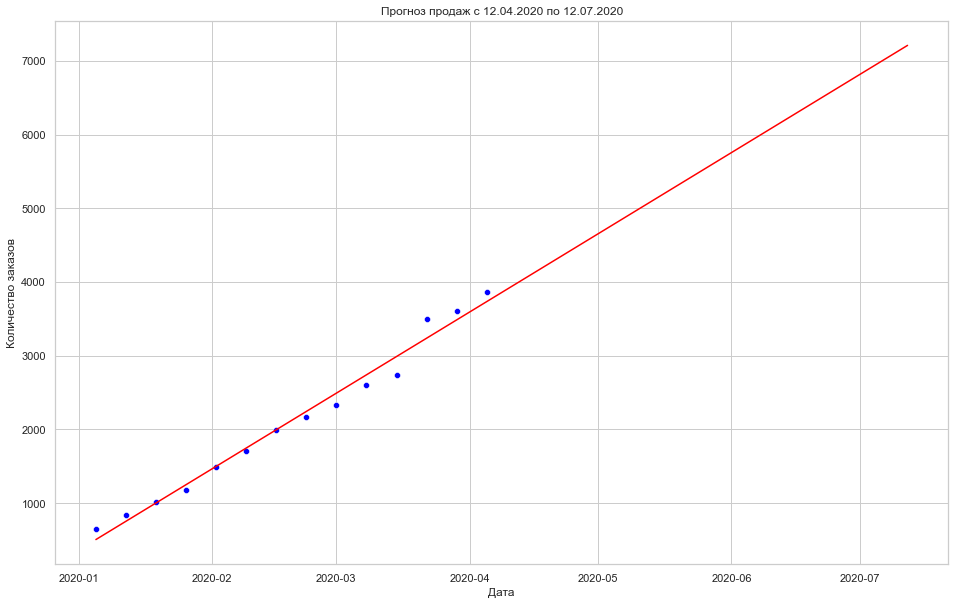

In [14]:
sns.scatterplot(x='date', y='orders_count', data=orders_real_and_predicted, color='blue')
sns.lineplot(x='date', y='orders_pred', data=orders_real_and_predicted, color='red', markers=True)
plt.title("Прогноз продаж с 12.04.2020 по 12.07.2020")
plt.xlabel('Дата')
plt.ylabel('Количество заказов')

In [15]:
# требуемый прогноз
predicted_orders_count = (
    orders_real_and_predicted
    .query('date > "2020-04-05"')
    .drop('orders_count', axis=1)
)
predicted_orders_count.orders_pred = predicted_orders_count.orders_pred.round()
predicted_orders_count.style.bar(subset=['orders_pred'], color='#67A5EB')

,date,orders_pred
14,2020-04-12 00:00:00,3981.000000
15,2020-04-19 00:00:00,4230.000000
16,2020-04-26 00:00:00,4478.000000
17,2020-05-03 00:00:00,4726.000000
18,2020-05-10 00:00:00,4974.000000
19,2020-05-17 00:00:00,5223.000000
20,2020-05-24 00:00:00,5471.000000
21,2020-05-31 00:00:00,5719.000000
22,2020-06-07 00:00:00,5968.000000
23,2020-06-14 00:00:00,6216.000000


### Задание 3

Вам нужно написать запрос, чтобы получить таблицу:

* purchase_date – дата покупки
* purchase_id – id покупки
* client_id – id покупателя
* client_age – возраст покупателя
* client_registration_age – как долго человек пользуется вашими магазинами
* client_category – содержит new или old, если это первая или последующая покупка соответственно
* promotion_name – акция
* category_name – категория
* partner_name – партнёр
* client_city – город, где находится покупатель
* city – город
* revenue – сумма выручки
* quantity – число проданных единиц

При этом в таблице должны присутствовать только значения, где в поле status стоит значение 1, и только те, где purchase_date находится в диапазоне от 01.05.2020 до 01.08.2020

In [16]:
import pandahouse as ph

In [17]:
# спрячем конфиденциальную информацию
connection_project = {'host': '?',
                      'database':'??',
                      'user':'???', 
                      'password':'????'
                     }

In [18]:
# запрос для clickhouse
query = '''

    select
        purchase_date,
        purchase_id,
        purchase.client_id client_id,
        date_diff(year, birth_date, now()) as client_age,
        date_diff(year, registration, now()) as client_registration_age,
        registration,
        case when min_purchase_date = purchase_date then 'new' else 'old' end client_category,
        prom.promotion_name as promotion_name,
        prom.category_name as category_name,
        prom.partner_name as partner_name,
        c1.client_city as client_city,
        c2.city as city,
        toInt64(price) * toInt64(quantity) as revenue,
        toInt64(quantity) as quantity
    from
        project_variant_2.purchase as purchase
    join
        (select
            client_id,
            min(purchase_date) as min_purchase_date
        from 
            project_variant_2.purchase
        group by client_id) as mindate
    on mindate.client_id = purchase.client_id
    
    left join project_variant_2.client as clients
    on purchase.client_id = clients.client_id
    
    left join project_variant_2.promotion as prom
    on prom.promotion_id = purchase.promotion_id 
    and prom.category_id = purchase.category_id 
    and prom.partner_id = purchase.partner_id
              
    left join
        (select client_city_id,
                client_city from project_variant_2.city
         group by client_city_id, client_city) as c1 
    on c1.client_city_id = clients.client_city_id
    
    left join (select city_id,
                      city from project_variant_2.city
                      group by city_id, city) as c2
    on c2.city_id = purchase.city_id   
    where
        status = 1
        and purchase_date between '2020-05-01' and '2020-08-01'
    order by
        purchase_date, purchase.client_id
    
    '''

In [19]:
# полученный датафрейм
data = ph.read_clickhouse(query=query, connection=connection_project)
data.head()

,purchase_date,purchase_id,client_id,client_age,client_registration_age,registration,client_category,promotion_name,category_name,partner_name,client_city,city,revenue,quantity
0,2020-05-01,5729,85,28,2,2019-10-14,old,,,,Казань,Санкт-Петербург,1500,5
1,2020-05-01,4574,88,28,1,2020-01-10,old,,,,Казань,Ярославль,450,3
2,2020-05-01,6375,99,28,1,2020-03-20,old,,,,Киев,Щучинщина,750,2
3,2020-05-01,1210,126,30,2,2019-06-18,old,campaign_3,Овощи,Всем партнёрам партнёр,Щучинщина,Ярославль,225,1
4,2020-05-01,6386,151,25,2,2019-03-10,old,,,,Ярославль,Щучинщина,1460,4
